### LDA

In [1]:
# 데이터 불러오기
from sklearn import datasets
raw_wine = datasets.load_wine()

In [2]:
# 피쳐, 타겟 데이터 지정
X = raw_wine.data
y = raw_wine.target

In [3]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=1)

In [4]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

In [5]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_tn_std, y_tn)
X_tn_lda = lda.transform(X_tn_std)
X_te_lda = lda.transform(X_te_std)

pca에서는 pca.fit(X_tn_std)이었지만, lda에서는 lda.fit(X_tn_std, y_tn)
pca는 비지도 학습인 반면, lda는 지도 학습이다.

In [6]:
# 차원축소 전후 데이터 차원 비교
print(X_tn_std.shape)
print(X_tn_lda.shape)

(133, 13)
(133, 2)


In [7]:
# LDA 상수항
print(lda.intercept_)

[ -9.49063922  -3.6792656  -10.65310672]


In [8]:
# LDA 가중 벡터
print(lda.coef_)

[[ 2.11536841  0.34171834  1.60756274 -2.62777005 -0.02954383 -1.92461007
   5.43612614  0.30142527 -0.66723405 -2.08948728  0.53569108  3.06011656
   5.45318503]
 [-1.18707715 -0.97635273 -1.64104916  1.19614378  0.22114803  0.2969019
   1.13721801  0.4338713   0.33425086 -1.57541361  0.56544507 -0.17730553
  -2.34856045]
 [-0.59547207  1.01875252  0.59754164  1.13544231 -0.28238675  1.65463974
  -7.48134065 -0.94177595  0.24492236  4.49319245 -1.38150969 -3.04974421
  -2.54627163]]


In [9]:
# LDA 데이터 셋
import pandas as pd
lda_columns = ['lda_comp1', 'lda_comp2']
X_tn_lda_df = pd.DataFrame(X_tn_lda,
                           columns=lda_columns)
X_tn_lda_df['target'] = y_tn
X_tn_lda_df.head(5)

,lda_comp1,lda_comp2,target
0,-2.563293,-0.503212,0
1,-0.646015,-2.169761,1
2,-3.981901,1.621584,0
3,-5.956216,3.878140,0
4,-4.047839,2.335699,0


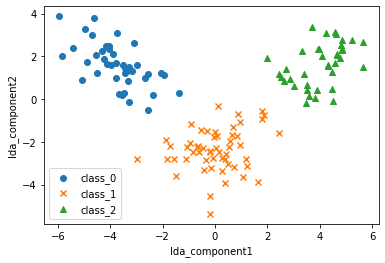

In [10]:
# LDA 시각화
import matplotlib.pyplot as plt
df = X_tn_lda_df
markers=['o','x','^']

for i, mark in enumerate(markers):
    X_i = df[df['target']== i]
    target_i = raw_wine.target_names[i]
    X1 = X_i['lda_comp1']
    X2 = X_i['lda_comp2']
    plt.scatter(X1, X2,
                marker=mark,
                label=target_i)
plt.xlabel('lda_component1')
plt.ylabel('lda_component2')
plt.legend()
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier
# 학습
clf_rf_lda = RandomForestClassifier(max_depth=2,
                                    random_state=0)
clf_rf_lda.fit(X_tn_lda, y_tn)

# 예측
pred_rf_lda = clf_rf_lda.predict(X_te_lda)

In [12]:
# LDA 적용 후 정확도
from sklearn.metrics import accuracy_score
accuracy_lda = accuracy_score(y_te, pred_rf_lda)
print(accuracy_lda)

1.0
